<a href="https://colab.research.google.com/github/sachinthadilshann/MLCourseUdemy/blob/main/RNN_and_LSTM_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
x_train.min(),x_train.max()

(0, 255)

In [6]:
y_train.min(),y_train.max()

(0, 9)

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train.min(),x_train.max()

(0.0, 1.0)

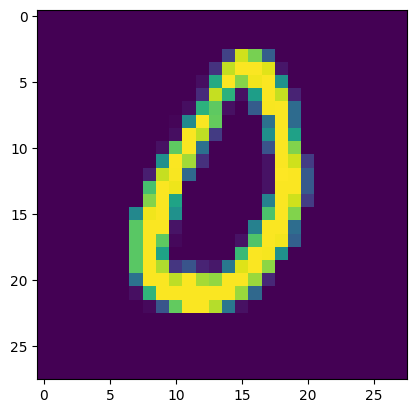

In [9]:
plt.imshow(x_train[666])

In [10]:
y_train[5]

2

In [11]:
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential([
    LSTM(128,activation='relu',return_sequences=True,input_shape=(28,28) ),
    Dropout(0.2),
    LSTM(128,activation = 'relu'),
    Dropout(0.2),
    Dense(32,activation = 'relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [14]:

opt = tf.keras.optimizers.Adam(learning_rate= 0.001)

In [15]:
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train,y_train,epochs=10,validation_data =(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 97s 47ms/step - loss: 0.7037 - accuracy: 0.7696 - val_loss: 0.1369 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1651 - accuracy: 0.9543 - val_loss: 0.0954 - val_accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1126 - accuracy: 0.9692 - val_loss: 0.0824 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0919 - accuracy: 0.9753 - val_loss: 0.0559 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0726 - accuracy: 0.9799 - val_loss: 0.0574 - val_accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0636 - accuracy: 0.9829 - val_loss: 0.0669 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0545 - accuracy: 0.9859 - val_loss: 0.0507 -

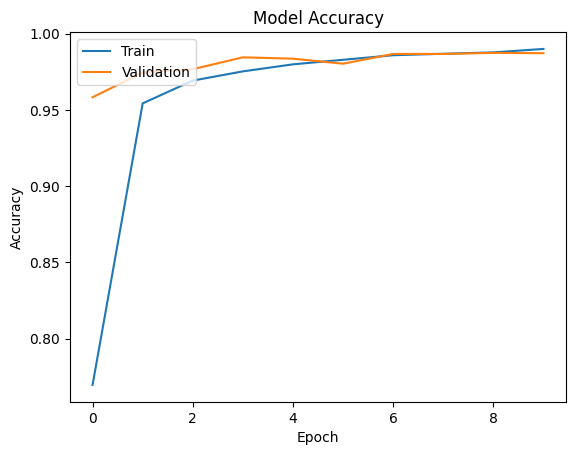

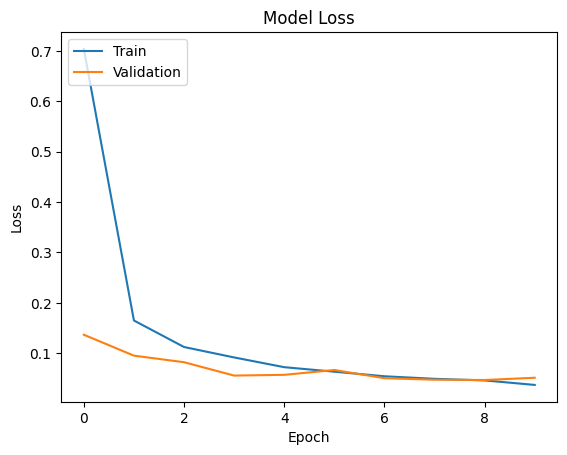

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
import numpy as np

In [33]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 3s 10ms/step


In [34]:
print(y_pred[0]),print(y_test[0])

7
7


(None, None)

In [37]:
print(y_pred[6]),print(y_test[6])

4
4


(None, None)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
cm = confusion_matrix(y_test,y_pred)

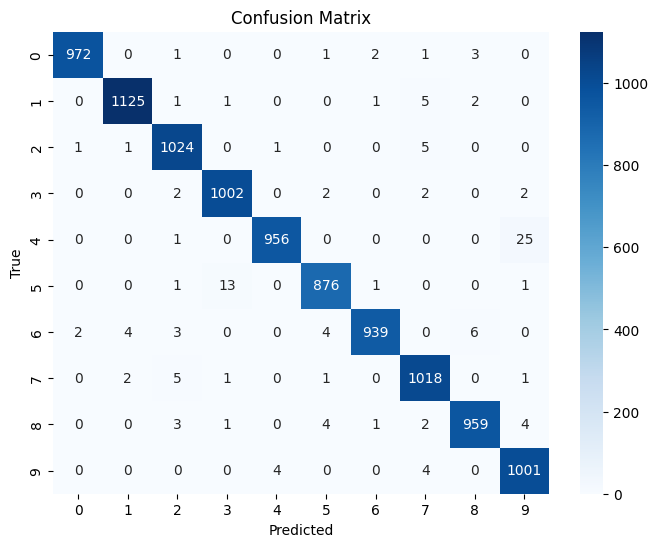

In [40]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9872
